In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [ ]:
import requests
import io
import pandas as pd

# URL of the CSV file
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch the data
response = requests.get(URL)
response.raise_for_status()  # Ensure the request was successful

# Read the data into a StringIO object and then into a Pandas DataFrame
text = io.StringIO(response.text)
df = pd.read_csv(text)

# Display the first few rows of the dataframe
print('Data downloaded and read into a dataframe!')
df.head()


Data downloaded and read into a dataframe!


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [ ]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Columns: 15 entries, Date to City
dtypes: float64(7), int64(4), object(4)
memory usage: 62.0+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

In [ ]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=528, step=1)

In [ ]:
yearly_sales = df.groupby(df['Year'])['Automobile_Sales'].mean()


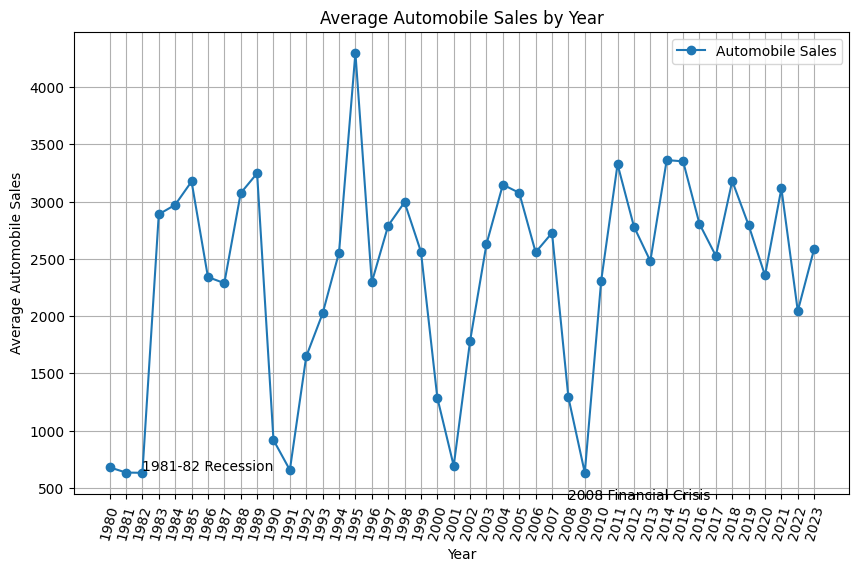

In [ ]:
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='line', marker='o')
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales by Year')
plt.text(1982, 650, '1981-82 Recession')
plt.text(2008, 400, '2008 Financial Crisis')
plt.legend(['Automobile Sales'])
plt.grid(True)
plt.show()

In [ ]:
df_recession = df[df['Recession'] == 1]

In [ ]:
df_Mline=df_recession .groupby(['Year','Vehicle_Type'],as_index=False)['Automobile_Sales'].mean()

In [ ]:
df_Mline.set_index('Year',inplace=True)

In [ ]:
df_Mline=df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']

In [ ]:
print(df_Mline)

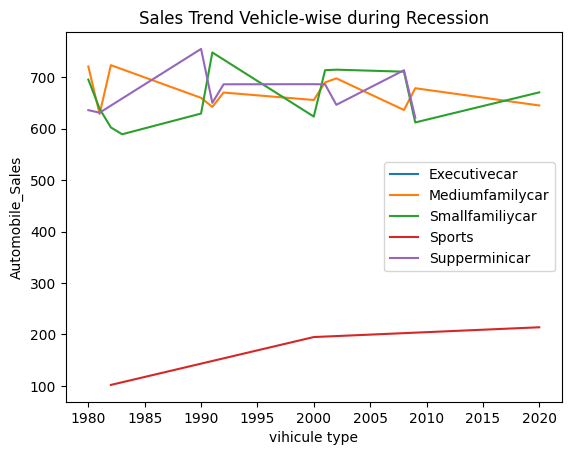

In [ ]:
    df_Mline.plot(kind='line')
    plt.xlabel('vihicule type')
    plt.ylabel('Automobile_Sales')
    plt.title('Sales Trend Vehicle-wise during Recession')
    plt.legend()
    plt.show()

#### From the above plot, what insights have you gained on the sales of various vehicle types?

We can observe that the type of cars most affected during a recession period is sports vehicles.


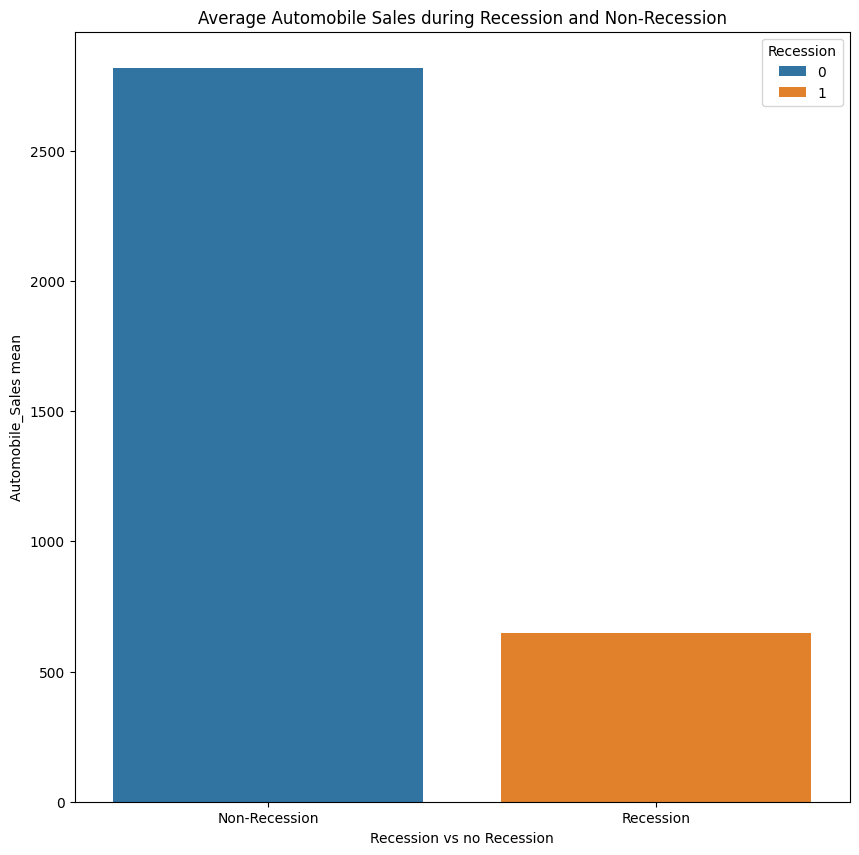

In [ ]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Recession vs no Recession')
plt.ylabel('Automobile_Sales mean')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

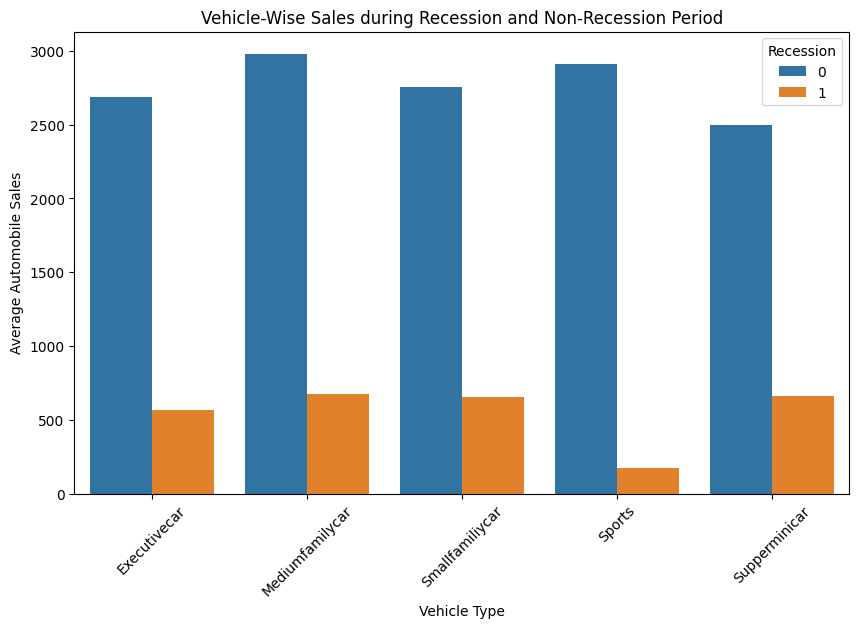

In [ ]:
recession_data = df[df['Recession'] == 1]
dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Recession', data=dd)
plt.xlabel('Vehicle Type')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.legend(title='Recession')
plt.xticks(rotation=45)
plt.show()

### From the above chart what insights have you gained on the overall sales of automobiles during recession?


In periods without recession, the medium-sized family car was purchased the most, followed closely by the sport category. However, during recession periods, as we found before the sport category showed the lowest average sales compared to other vehicle types.

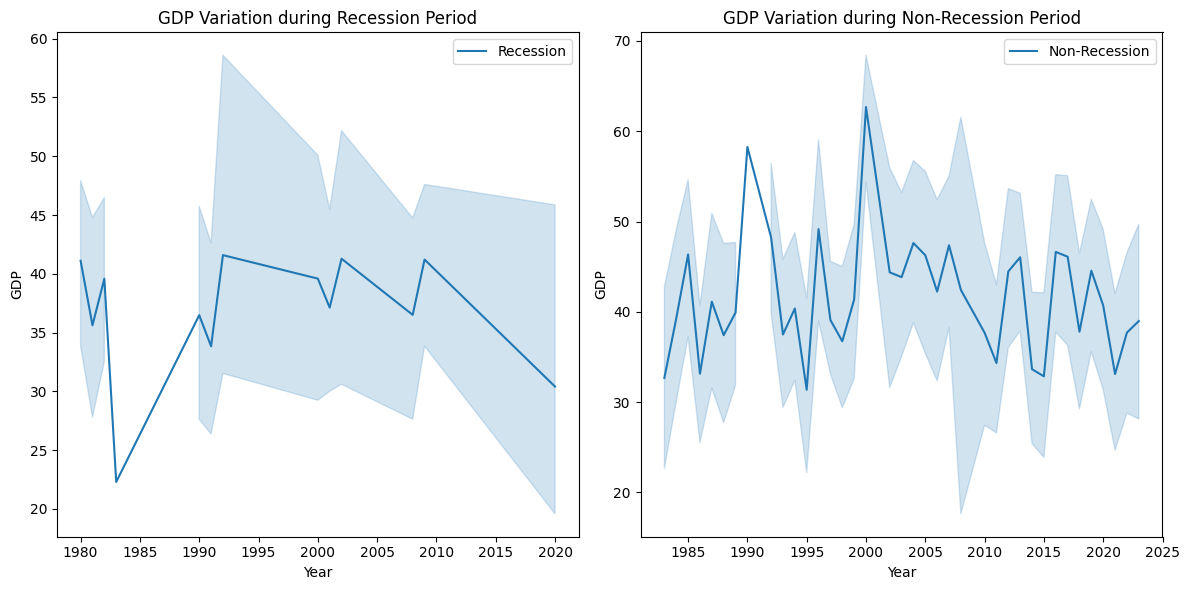

In [ ]:

rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]
fig = plt.figure(figsize=(12, 6))


ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

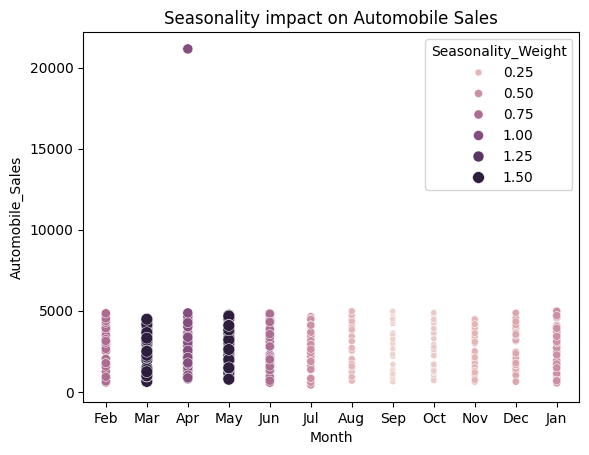

In [ ]:
non_rec_data = df[df['Recession'] == 0]
size=non_rec_data['Seasonality_Weight']
sns.scatterplot(data=non_rec_data,hue='Seasonality_Weight', x='Month', y='Automobile_Sales', size=size)
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.show()

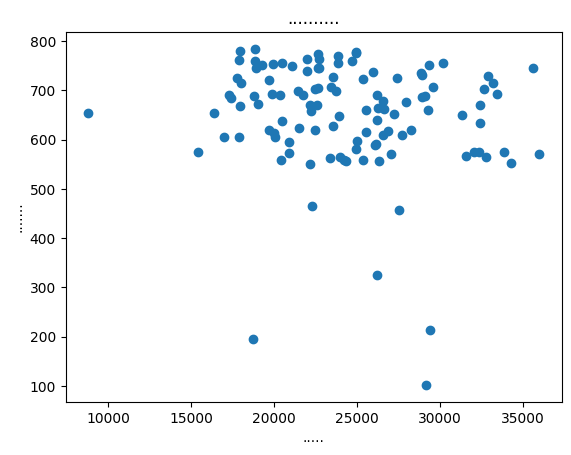

In [ ]:
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])
plt.xlabel('.....')
plt.ylabel('.......')
plt.title('..........')
plt.show()

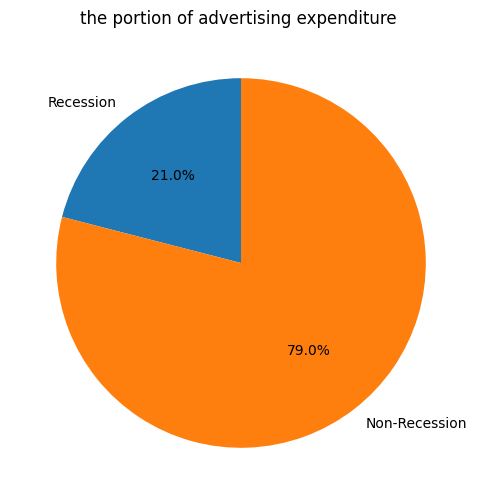

In [ ]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()
plt.figure(figsize=(8, 6))
labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('the portion of advertising expenditure ')
plt.show()

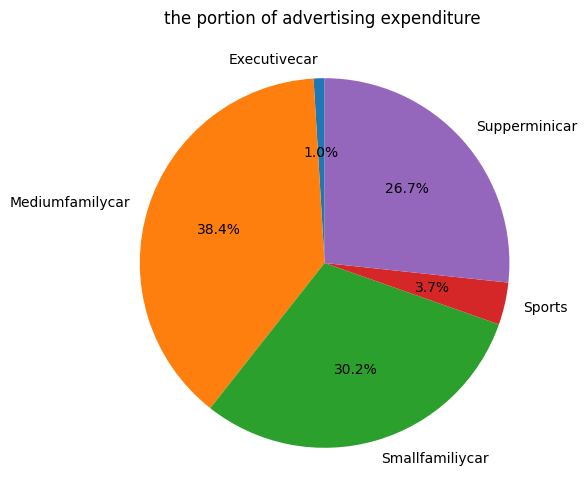

In [ ]:
Rdata = df[df['Recession'] == 1]
RAtotal = Rdata.groupby(['Vehicle_Type'])['Advertising_Expenditure'].sum()
plt.figure(figsize=(8, 6))
labels = RAtotal.index.tolist()
sizes = RAtotal.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('the portion of advertising expenditure ')
plt.show()

<ipython-input-104-59a453784ef1>:2: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',


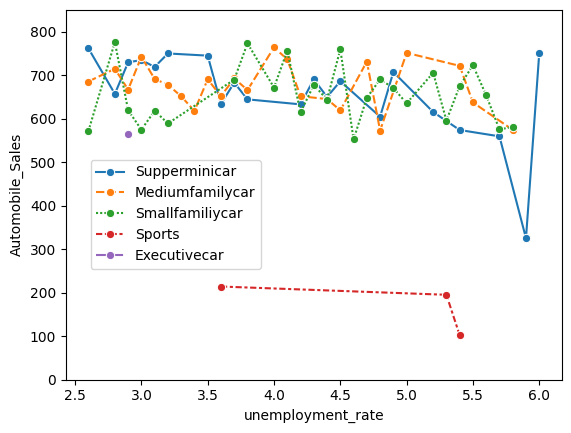

In [ ]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))

#### From the above plot, what insights have you gained on the sales of superminicar, smallfamilycar, mediumminicar?


Superminicar sales decrease with the increasing unemployment rate and for others, there is no clear impact visible.
